<a href="https://colab.research.google.com/github/wanderson42/Portfolio-DS/blob/main/Projeto_de_Interpretabilidade_de_modelos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Science**

# **Projeto de Portfólio:**

<span style='color:Gray'> Interpretabilidade de modelos de aprendizagem supervisionada (RandomForestClassifier) usando SHAP  </span>

</div>
<center><img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1173320%2F4d39e3a335b20b0bb8e25d58f0e00337%2F1.png?generation=1609003097648061&alt=media" width="500"/>
</div>

Predizendo a inadimplência de clientes: *German Credit Dataset*


Autor: Wanderson Ferreira

## **1. Introdução: Informações sobre o Dataset**

</div>
<center><img src="https://raw.githubusercontent.com/wanderson42/portfolio-data/main/credit_risk.jpg" width="600"/> <center>
</div>

<p><center>Imagem meramente ilustrativa</center></p>


O presente dataset é constituido por uma serie de atributos sociodemográficos que descrevem o perfil individual de uma carteira de 1000 clientes residentes na Alemanha que tiveram uma carta de crédito aprovada (por algum estabelecimento comercial) para financiar a compra de um determinado bem de consumo. O dataset original contém 20 atributos numéricos/categóricos. Nesse caso, foi utilizado uma versão simplificada do dataset contendo 10 atributos. O link para o dataset original pode ser encontrado abaixo.

**Fonte do dataset:** https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Cada instância do dataset (linha) representa uma pessoa que recebeu uma carta de crédito. Dentre todos os atributos do dataset (colunas) temos o atributo `risk` de natureza binária, que classifica clientes como bons ou ruins.

**Descrição do dataset:**

> - **age:** Idade do cliente;
>
> - **sex:** Male ou Female;
>
> - **job:** Tipo de emprego do cliente: unskilled and non-resident, unskilled and resident, skilled, highly skilled;
>
> - **housing:** Tipo de moradia: own, rent, free;
>
> - **saving_accounts:** "Tamanho" da conta poupança:  little, moderate, quite rich, rich;
>
> - **checking_account:** "Tamanho" da conta corrente:  little, moderate, rich;
> - **credit_amount:** Valor da carta de crédito fornecida para o cliente;
>
> - **duration:** Tempo previsto para quitação da divida (em meses);
>
> - **purpose:** Finalidade do crédito: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others;
própria (sim/não);
>
> - **risk:** Cliente Bom ou Cliente Ruim.

Com base na lista de atributos acima, o objetivo geral deste presente projeto de portfólio é a construção de um modelo preditivo de classificação, via Pipeline do Sklearn, que auxilie a gerência de uma instituição financeira na tomada de decisão em aprovar ou não a concessão de uma carta de crédito, identicando potenciais clientes bons pagadores, com base nos seus respectivos perfis, e com isto, minimizar os riscos de inadimplência.

As seguintes abordagens foram levadas em conta para desenvolver a classificação binaria:

> - **Random Forest**


## **2. Importando Bibliotecas de Ciência de Dados**

In [ ]:
%%capture
! pip install category_encoders
! pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## **3. Carregando o dataset**



In [ ]:
#Dataset
url = 'https://raw.githubusercontent.com/wanderson42/Portfolio-DS/main/datasets/german_credit_data.csv'
df = pd.read_csv(url, index_col=0)

 Como parte da investigação inicial, segue abaixo uma ánalise explotória dos dados (EDA - Exploratory Data Analysis), para melhor definirmos a estrutura do Pipeline e consequentemente a obtenção de um bom modelo de classificação.

## **4. Exploratory Data Analysis (EDA): Uma inspeção dos nossos dados**

**4.1 Noção geral da estrutura do dataset**

In [ ]:
#Primeiras impressões sobre o dataframe
display(df.sample(n = 8).style.background_gradient(cmap = 'Set3')); print(); display(df.info())

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
983,26,male,skilled,own,little,little,8229,36,car,bad
542,31,male,skilled,own,nan,little,6350,30,furniture/equipment,bad
563,37,male,skilled,free,nan,moderate,12389,36,car,bad
728,59,female,skilled,rent,little,moderate,6416,48,business,bad
998,23,male,skilled,free,little,little,1845,45,radio/TV,bad
679,26,female,skilled,own,little,nan,1453,18,radio/TV,good
693,44,male,unskilled_&_resident,own,nan,little,4716,6,car,good
894,29,male,skilled,own,nan,nan,1169,18,radio/TV,good



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   object
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 85.9+ KB


None

> - Dentre as 10 features do dataset, um total de 3 features são do tipo int64 e 7 features são do tipo objeto;
>
> - As features `saving_accounts` e `checking_account` são as duas únicas que apresentam valores ausentes.

In [ ]:
df['risk'].value_counts(normalize=True) * 100

good    70.0
bad     30.0
Name: risk, dtype: float64

**4.2 Inspecionando valores ausentes (NaN)**

In [ ]:
def f1():
  # Calculando o valor total de Nan values no dataset de treino
  df_total_nan = df.isnull().sum()
  df_percent_nan = ((df.isnull().sum()/df.shape[0])*100)
  # Construindo uma tabela de missing values
  table_missing_data = pd.concat([df_total_nan,df_percent_nan], axis=1, keys=['NaN', 'NaN(%)'], sort = True)
  # Somando todos os missing values de ambas as colunas
  a = table_missing_data['NaN'].sum(); b = a*100/(df.shape[0])
  # Adicionando uma linha contento os valores totais
  row = pd.Series({'NaN':a,'NaN(%)':b},name='Total')
  table_missing_data = table_missing_data.append(row)
  table_missing_data = table_missing_data.astype(int)
  return display(table_missing_data.style.bar(color = 'salmon'))

f1()

,NaN,NaN(%)
age,0,0
checking_account,394,39
credit_amount,0,0
duration,0,0
housing,0,0
job,0,0
purpose,0,0
risk,0,0
saving_accounts,183,18
sex,0,0


In [ ]:
# Saving accounts has 183 missing values and Checking account 394 misisng values
# check Saving accounts
print(df['saving_accounts'].describe())
print()
print(df['checking_account'].describe())

count        817
unique         4
top       little
freq         603
Name: saving_accounts, dtype: object

count        606
unique         3
top       little
freq         274
Name: checking_account, dtype: object


> -  A feature `checking_account` possui 394 (39%) valores ausentes;
>
> - A feature `saving_accounts` possui 183 (18%) valores ausentes.
>
> - O dataset totaliza 577 (57%) instâncias contendo algum valor ausente;

Pesquisando a fonte original do dataset, observei que valores ausentes em `checking_account` se referem a clientes sem conta corrente (`no_checking_account`). E valores ausentes `saving_accounts` correspondem a clientes sem conta poupança ou desconhecida (`unknown/no_savings_account`)
Prosseguindo com a EDA, agora seguimos com uma análise estatística mulvariada:

**4.3 Analise estatistica multivariada das features numéricas**


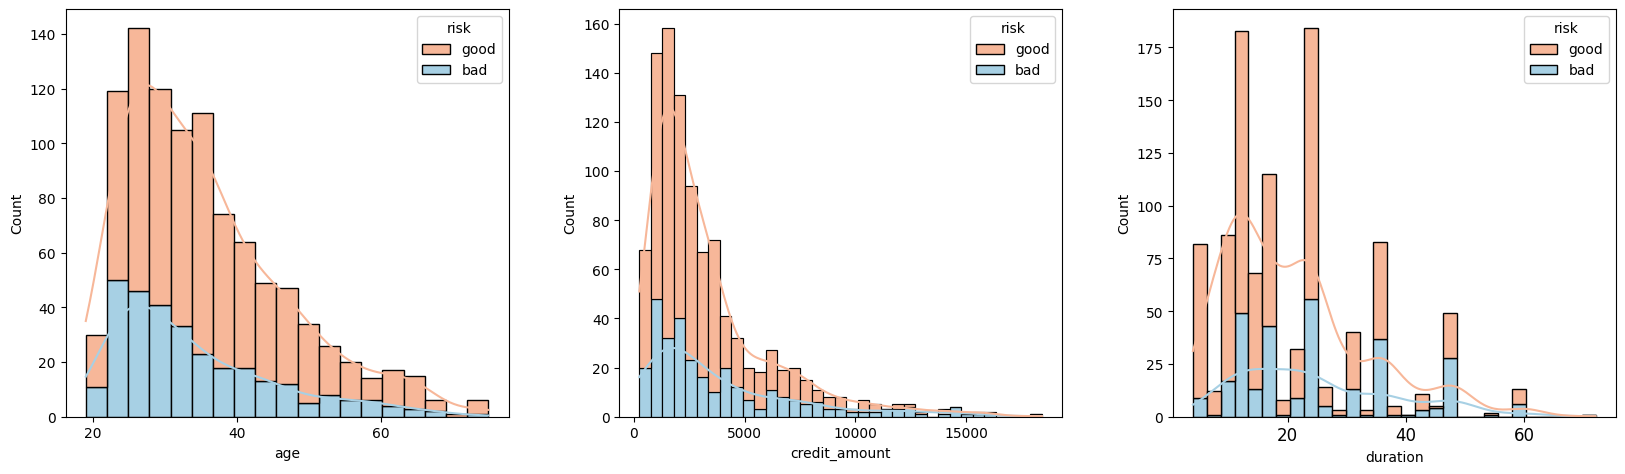

In [ ]:
plt.figure(figsize=(20, 18))

plt.subplot(331)
ax1 = sns.histplot(data = df, x = 'age', hue="risk", palette='RdBu', multiple='stack', kde=True, alpha = 1.0)

plt.subplot(332)
ax2 = sns.histplot(data = df, x = 'credit_amount', hue="risk", palette='RdBu', multiple='stack', kde=True, alpha = 1.0)

plt.subplot(333)
ax3 = sns.histplot(data = df, x = 'duration', hue="risk", palette= 'RdBu', multiple='stack', kde=True, alpha = 1.0)

plt.rcParams.update({'font.size': 16})
plt.xticks(fontsize=12)
plt.subplots_adjust(wspace=0.25)
plt.show()

Conforme a distribuição de dados nos histogramas acima, pode-se destacar, que:

> - Os clientes com idade (`age`) entre 25 e 45 anos são mais propensos a solicitar uma carta de crédito. E proporcionalmente a maior parte dos inadimplentes corresponde a essa faixa etária;
>
> - A maioria dos clientes são menos propensos a solicitar uma carta de crédito com valor muito alto (`credit_amount`). E esses emprestimos com valores girando em torno de até 4000 são os que proporcionalmente tem o menor risco de inadimplência;
>
> - Clientes com o prazo de quitação da carta de crédito em até 24 meses (`duration`), proporcionalmente oferecem menos risco de inadimplência.


**4.4 Analise estatistica multivariada de features categóricas:**


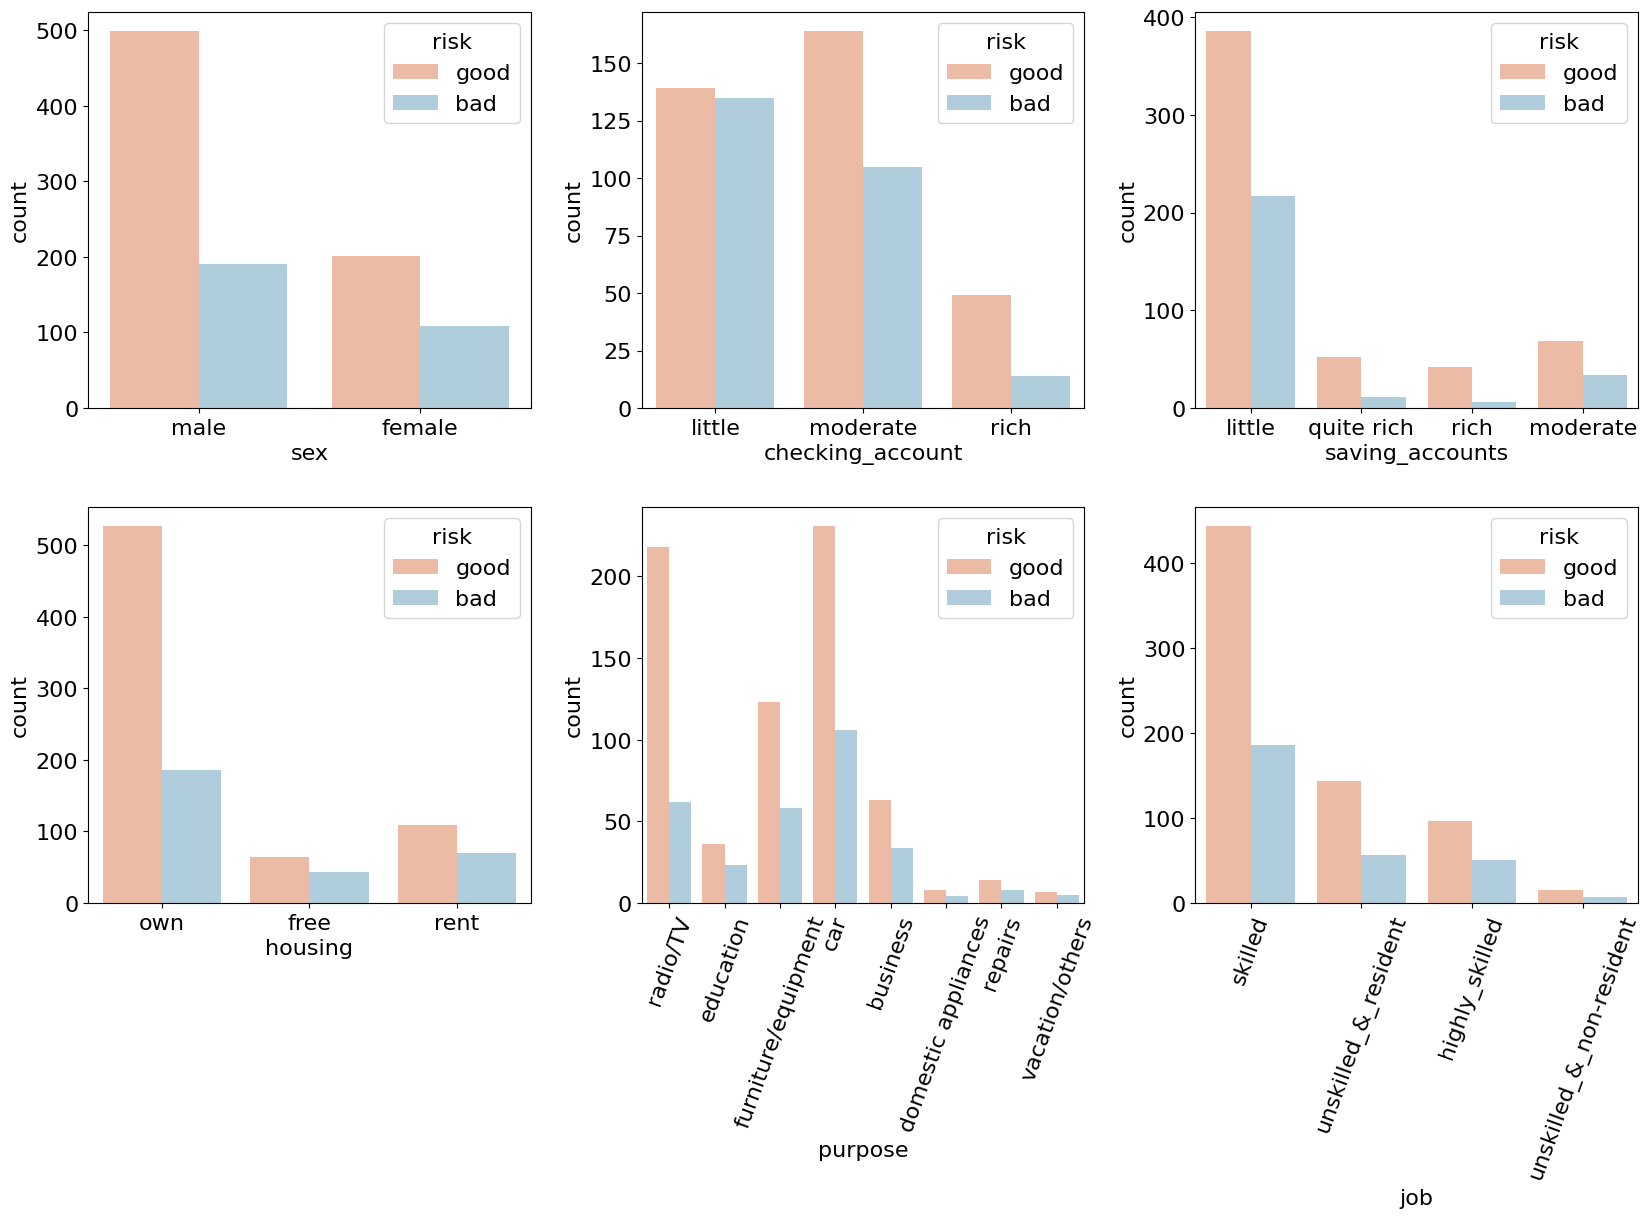

In [ ]:
plt.figure(figsize=(20, 18))

plt.subplot(331)
ax1 = sns.countplot(data = df, x = 'sex', hue="risk", palette='RdBu')

plt.subplot(332)
ax2 =  sns.countplot(data = df, x = 'checking_account', hue="risk", palette='RdBu')

plt.subplot(333)
ax3 = sns.countplot(data = df, x = 'saving_accounts', hue="risk", palette= 'RdBu')

plt.subplot(334)
ax4 = sns.countplot(data = df, x = 'housing', hue="risk", palette= 'RdBu')

plt.subplot(335)
ax5 = sns.countplot(data = df, x = 'purpose', hue="risk", palette= 'RdBu')
plt.xticks(rotation = 70)

plt.subplot(336)
ax6 = sns.countplot(data = df, x = 'job', hue="risk", palette= 'RdBu')
plt.xticks(rotation = 70)

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

Analisando os gráficos dispostos acima, observa-se que:

> - O número de clientes do gênero feminino (female) é proporcionalmente 1/3 do gênero masculino (male). E elas, são menos propensas a inadimplência.;
>
> - A distribuição majoritaria de clientes corresponde a um status de conta corrente equivalente a individuos de baixa renda (`little`) ou renda média (`moderate`), cujo os primeiros, oferencem maior risco de inadimplência.
>
> - O hábito de poupar dinheiro não é uma prática difundida entre os clientes, cuja a grande maioria possui status de conta poupança equivalente a baixa renda. E como já esperado, os menos abastados tendem a inadimplência;
>
> - Cerca de 2/3 dos clientes possui casa própria. E 1/3 dos clientes que não possuem casa própria tendem a não ser bons pagadores;
>
> - O motivo mais apontado pelos clientes em solicitar uma carta de crédito é a aquisição de um carro, seguido por rádio/tv e imóvel. E da mesma forma, essas três categorias, apresentam os maiores indicativos de inadimplência. No entanto, proporcionalmente, os clientes tendem a serem mais inadimplentes ao solicitarem empréstimo para educação (`education`), empreendedorismo (`business`) e férias (`vacation`);
>
> - A maioria dos inadimplentes são cidadãos alemães cuja a força de trabalho é qualificada (`skilled`), seguidos pelos alemães cuja a mão de obra é não qualificada. Todavia, proporcionalmente, os clientes cuja mão de obra é altamente qualificada (`highly_skilled`), são mais sucetiveis a inadimplência.

Usando apenas estatística descritiva, obteve-se informações valiosas que fomentam uma tomada de decisão aprimorada por parte da gerência do banco sobre como prosseguir com o solicitante da carta de crédito. Agora, construindo um modelo preditivo por meio do dataset, pode-se aprimorar ainda mais as chances de emitir bons empréstimos (ganho financeiro) e minimizar empréstimos ruins (perda financeira).

In [ ]:
df.describe()

,age,credit_amount,duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


## **5. Feature Engineering & Construção do Modelo: Pipelines**

Uma vez efetuada a EDA, vamos escrever o código que contempla o processo de feature engineering através de pipelines do scikit-learn.

**5.1 Feature Engineering**


In [ ]:
'''
# Padronização de features
scaler = StandardScaler().set_output(transform="pandas")

# Aplicando as transformações
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
'''
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Padronizando nomes de algumas features
df['saving_accounts'] = df['saving_accounts'].replace('quite rich', 'quite_rich')
df['purpose'] = df['purpose'].replace('domestic appliances', 'domestic_appliances')

# Dividindo os dados em conjunto de feature e target
X = df.drop(['risk'], axis=1)
y = df['risk'].map({'good': 1, 'bad': 0}) #Binarizando a variavel target

# Lista de features quanto a natureza dos dados
numeric_features = [col for col in X.columns if X[col].dtype == 'int64']
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Imputação de Features
'''
NaN em saving_accounts é 'no/unknown'¹
NaN em checking_account é 'no'¹
¹Referência: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
'''
X['saving_accounts'] = X['saving_accounts'].fillna('no/unknown')
X['checking_account'] = X['checking_account'].fillna('no')

# OneHotEncoding perfeito nas features para usar com SHAP
ohe = make_column_transformer(
              (OneHotEncoder(handle_unknown = 'ignore'), categorical_features),
              remainder='passthrough')
X = pd.DataFrame(ohe.fit_transform(X), columns=ohe.get_feature_names_out())

# Removendo prefixo
X.columns = X.columns.map(lambda x: x.removeprefix("onehotencoder__"))
X.columns = X.columns.map(lambda x: x.removeprefix("remainder__"))

# Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**5.2 Aplicação do Modelo Random Forest:**






**5.2.1 Otimização de Hiperparâmetros:**

In [ ]:
#@title
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline
def optimizacaoHP(modelo, params, metrica, cv_gerador, features, objetivo):
    # Definir Objeto de busca com Bayes Optmization
    sampler = SMOTE(random_state=42)
    smp_pipeline = make_pipeline(sampler, modelo)

    hp_search = GridSearchCV(smp_pipeline,
                                   params,
                                   scoring=metrica,
                                   cv=cv_gerador,
                                   verbose=0,
                                   n_jobs = -1)
    # Buscar
    hp_search.fit(features, objetivo)
    # Retornar resultado
    return (hp_search.best_estimator_, hp_search.best_params_, hp_search.best_score_, hp_search.cv_results_)

def PipelineDeOtimizacaoHP(modelo,params,x_train,y_train,metrica,cv_gerador):
    # 1 - Buscar
    best_model,best_params,best_score,cv_results = optimizacaoHP(modelo,params,metrica,cv_gerador,x_train,y_train)

    # 2 - Mostrar resultados finais
    mostrarResultadosFinaisOtimizacao(best_model, best_params, best_score, metrica)
    # 3 - Retornar resultados
    returned_dict = {'best_model':best_model,'best_params':best_params,'best_score':best_score,
                     'cv_res':pd.DataFrame(cv_results),'metric_used':metrica}
    return returned_dict

def mostrarResultadosFinaisOtimizacao(modelo, hp, score, metrica_avaliada):
    print('Model:', type(modelo).__name__)
    print('Metric: ', metrica_avaliada, ' | Score (%): ', 100*round(score,5))
    print('Best Parameters: ', hp)

**5.2.2 Matriz Confusão:**

In [ ]:
#@title
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
def plot_confusion_matrix(cf_matrix):
    group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(7,5)); ax = sns.heatmap(cf_matrix, annot=labels, fmt='',annot_kws={"fontsize":11},cmap="coolwarm")
    ax.set_title('Matriz Confusão'); ax.set_xlabel('\nPredito', fontsize=13); ax.set_ylabel('Real', fontsize=13);
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Mal Pagador','Bom pagador'],fontsize=13)
    ax.yaxis.set_ticklabels(['Mal Pagador','Bom pagador'],fontsize=13)
    ## Display the visualization of the Confusion Matrix.
    plt.show()

**5.2.3 Execução:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth =  [3, 4, 5]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
params = {'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__bootstrap': bootstrap}
estimador = RandomForestClassifier(n_estimators = 100)
strat_cv_folds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# Otimizar
rfc = PipelineDeOtimizacaoHP(estimador, params, X_train, y_train, 'f1_macro', strat_cv_folds)

Model: Pipeline
Metric:  f1_macro  | Score (%):  67.756
Best Parameters:  {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 10}


No código acima, em cada objeto `GridSearchCV` criado, testa-se cada hyperparâmetro correspondente ao seu respectivo modelo de pipeline. No caso, os hiperparâmetros foram tunados com `cv = 5` para o gridsearch realizar a validação cruzada em nosso conjunto de dados e `scoring = f1_macro` como métrica para obtermos uma avaliação de cada modelo.



 Agora plotando a matriz de confusão para este modelo no conjunto de dados:



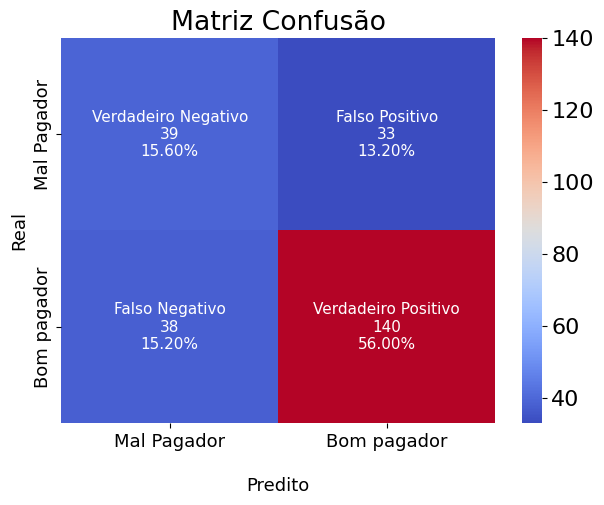

None

              precision    recall  f1-score   support

           0       0.51      0.54      0.52        72
           1       0.81      0.79      0.80       178

    accuracy                           0.72       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.72      0.72      0.72       250

Fbeta_score =  0.7909604519774013


In [ ]:
# Fazer predicao
y_pred = rfc['best_model'].predict(X_test)
# Matriz Confusão
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
display(plot_confusion_matrix(cf_matrix))
print(metrics.classification_report(y_test, y_pred))
print("Fbeta_score = ", metrics.fbeta_score(y_test, y_pred, beta=2))

Dado a complexidade do problema, o classificador Random Forest fez um bom trabalho ao prever a inadimplência ao observarmos o número de Falso Positivo na diagonal. Lembrando que a minimização da classe positiva é um objetivo da tarefa de previsão, uma vez que é mais custoso para o banco ou instituição financeira dar dinheiro a um cliente ruim do que não dar dinheiro a um cliente bom. Isso deve ser levado em consideração ao selecionar uma métrica de desempenho de preferência.

Neste contexto, quando fitamos o modelos e predizemos a variável alvo, muitas vezes queremos entender quais features causam mais impacto em nossos resultados obtidos, ou seja, quais destas features são mais importantes para prever se um cliente é bom ou mal pagador:

In [ ]:
print("\033[1mNº of columns:",X_test.shape[1])
print("----------------------------------------------")
for col in X_test.columns:
    print('\033[1m' + col)

Nº of columns: 29
----------------------------------------------
sex_female
sex_male
job_highly_skilled
job_skilled
job_unskilled_&_non-resident
job_unskilled_&_resident
housing_free
housing_own
housing_rent
saving_accounts_little
saving_accounts_moderate
saving_accounts_no/unknown
saving_accounts_quite_rich
saving_accounts_rich
checking_account_little
checking_account_moderate
checking_account_no
checking_account_rich
purpose_business
purpose_car
purpose_domestic_appliances
purpose_education
purpose_furniture/equipment
purpose_radio/TV
purpose_repairs
purpose_vacation/others
age
credit_amount
duration


**5.2.4 Algumas considerações:**

De fato há muitas razões para estimarmos a importância das features. Quer seja a **interpretabilidade do modelo**, **redução de dimensionalidade** para melhorar perfomance e agregar mais confiança ao modelo de aprendizagem de máquina ou as partes interessadas querem "simplesmente" saber quais são as features mais importantes para a predição. Há muitas maneiras diferentes de calcular a *feature importance* para diferentes tipos de modelos de aprendizagem de máquina. Por exemplo:

> - Um método baseado em **Coefficients** pode ser usado para estimar uma *feature importance* relativa em modelos lineares (e.g, regressão linear, regressão logistica, etc.), ou seja, o valor absoluto do coeficiente associado a uma feature mede seu respectivo grau de importância. Este método é computacionalmente barato, pois os coeficientes são calculados quando nos fitamos o modelo.
>
> - Métodos do tipo **Aggregate** são muito populares em modelos do tipo *ensemble*, ou seja, podemos calcular a importância através do índice de Gini para uma única árvore (decision tree), ou podemos calcular a importância através da média do índice de Gini de uma floresta inteira (random forest) para obter uma estimativa mais robusta.
>
> - Outra maneira de estimar a importância de features é através de métodos do tipo **Permutation**. Essencialmente nesse tipo de método, removemos as features do modelo (uma de cada vez) e assim avaliamos o quanto a acurácia da predição muda. Portanto, uma maneira de "remover" uma feature é permutar aleatoriamente os valores para essa feature, em seguida, reajustar o modelo. Isto pode ser implementado com qualquer modelo de aprendizagem de máquina. A contribuição de cada *feature* ($i$) é definida através da expressão abaixo:
$$\varphi_{i}(v) = \sum_{S\subseteq N \backslash
 i} \frac{|S|! \left ( n - |S| - 1 \right )!}{n!} \left ( v (S \cup {i}) - v(S) \right )$$

Onde $n$ é o número total de features, $S$ é um conjunto de features e $v(S)$ é a função que define a soma das contribuições das $S$ features. A primeira parte da expressão é responsável por calcular a média das permutações de contribuição possíveis entre as features. Já a segunda parte utiliza a função $v$ para calcular uma contribuição marginal individual de cada feature $i$.

É importante mencionar uma desvantagem em potencial do método é que ele **pode ser** relativamente custoso computacionalmente porque exige que façamos o *refit* do modelo inúmeras vezes.

A seguir tratarei a respeito da interpretabilidade do modelo RandomForestClassifier, que foi treinado para previsão de inadimplência financeira. com foco na aplicação de um método baseado em permutação de variáveis.

## **6. Interpretabilidade dos resultados de classificadores do Sklearn para predição da inadimplência financeira - Biblioteca SHAP**
</div>
<center><img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1173320%2F4d39e3a335b20b0bb8e25d58f0e00337%2F1.png?generation=1609003097648061&alt=media" width="500"/>
</div>



SHapley Additive exPlanations (SHAP) é um método relativamente recente que busca explicar as decisões dos modelos de inteligência artificial de uma forma mais direta e intuitiva, fugindo de soluções "caixa preta".

O SHAP mede o impacto das variáveis, levando em consideração a interação com outras variáveis. Seu conceito é baseado na teoria dos jogos com uma matemática bem robusta.  Os valores de Shapley calculam a importância de um recurso comparando o que um modelo prevê com e sem o recurso. No entanto, como a ordem na qual um modelo vê recursos pode afetar suas previsões, isso é feito em todas as ordens possíveis, para que os recursos sejam comparados de maneira justa.

Para construção desta análise, foi utilizada a biblioteca SHAP para demonstrar interpretações práticas utilizando os resultados aqui obtidos pelos classificadores do SKlearn para predição da inadimplência financeira. Primeiramente vamos calcular os valores SHAP para o conjunto de dados de teste:

In [ ]:
import shap

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

best_model = RandomForestClassifier(bootstrap=True, n_estimators= 100,
                                    max_depth = 3, min_samples_split=10,
                                    max_features = 'auto', min_samples_leaf = 4)


best_model.fit(X_train_sm, y_train_sm)

# Cálculo do SHAP - Definindo explainer com características desejadas
explainer = shap.TreeExplainer(best_model)

# Cálculo do SHAP
shap_values = explainer.shap_values(X_test)

Conforme o código exposta na célula acima, note que eu defini um `TreeExplainer`, pois o modelo considerado o RandomForest é baseado em árvore, logo, a biblioteca possui um explainer específico para esta família de modelos. Com o conjunto de valores SHAP já definidos para o nosso conjunto de teste, podemos avaliar como cada valor de cada variável influenciou no resultado alcançado pelo modelo preditivo.

Em nosso caso, estaremos avaliando os resultados dos modelos em termos de probabilidade, ou seja, a porcentagem X que o modelo apresentou para dizer se a classe correta é 0 (mal pagador) ou 1 (bom pagador) para uma dada instancia do dataset. Vale ressaltar que isso pode variar de modelo para modelo. Caso você use um modelo XGBoost, provavelmente seu resultado padrão não será em termos de probabilidade como é o da random forest do pacote sklearn.

Mas chega de papo e vamos lá: Como posso interpretar os valores de SHAP? Para isso, vamos calcular o resultado de probabilidade de predição do dataset para uma **amostra** (no caso linha 7 do dataset) que previu valor positivo:






In [ ]:
# Probabilidade de predição do conjunto de treino
y_pred_proba = best_model.predict_proba(X_test)

# Vamos agora selecionar um resultado que previu como positivo (bom pagador)
print('Probabilidade do modelo prever positivo -',100*y_pred_proba[8][1].round(2),'%.')
print('Probabilidade do modelo prever negativo -',100*y_pred_proba[8][0].round(1),'%.')

Probabilidade do modelo prever positivo - 68.0 %.
Probabilidade do modelo prever negativo - 30.0 %.


O código acima gerou a probabilidade dada pelo modelo para as duas classes. Vamos visualizar agora os valores de SHAP para aquela amostra de acordo as classes possíveis:




In [ ]:
print('Valores de SHAP para essa amostra na classe positiva')
print(shap_values[1][8])
print('Valores de SHAP para essa amostra na classe negativa')
print(shap_values[0][8])

Valores de SHAP para essa amostra na classe positiva
[ 1.78817697e-02  1.20290933e-02  6.63216450e-04 -1.97144741e-03
  0.00000000e+00 -1.12150457e-03  2.36669693e-04 -3.69659941e-02
 -2.14820013e-02  1.37235669e-02 -5.22492053e-03 -4.07476361e-03
 -4.88944568e-04 -3.32971147e-04  5.12508450e-02  3.37951316e-02
  1.21617573e-01 -1.26126833e-04  6.55416984e-04 -2.53888007e-03
  0.00000000e+00  8.12206435e-04 -6.22731888e-04 -8.50718635e-03
  4.69180236e-05  0.00000000e+00 -6.10275522e-03  3.53834917e-03
  1.21271177e-02]
Valores de SHAP para essa amostra na classe negativa
[-1.78817697e-02 -1.20290933e-02 -6.63216450e-04  1.97144741e-03
  0.00000000e+00  1.12150457e-03 -2.36669693e-04  3.69659941e-02
  2.14820013e-02 -1.37235669e-02  5.22492053e-03  4.07476361e-03
  4.88944568e-04  3.32971147e-04 -5.12508450e-02 -3.37951316e-02
 -1.21617573e-01  1.26126833e-04 -6.55416984e-04  2.53888007e-03
  0.00000000e+00 -8.12206435e-04  6.22731888e-04  8.50718635e-03
 -4.69180236e-05  0.00000000e+0

Se observarmos com atenção é fácil perceber que os valores em ambos os arrays são iguais em módulo. Logo se a gente realizar a soma desses vetores:


In [ ]:
print('Somatório do valor SHAP - Classe positiva: ',shap_values[1][8].sum().round(2))
print('Somatório do valor SHAP - Classe negativa: ',shap_values[0][8].sum().round(2))

Somatório do valor SHAP - Classe positiva:  0.18
Somatório do valor SHAP - Classe negativa:  -0.18


Os valores se diferenciam de acordo com o sinal. Podemos dizer que os valores SHAP para classe positiva são como o espelho da classe negativa (no caso binário), cabendo a nós a escolha de uma classe como referência para efetuarmos a interpretabilidade dos resultados. Tendo isso em mente agora vamos avaliar outro fator importante para nos ajudar no entendimento dos valores SHAP: O valor de base.

O valor de base é extraído do próprio Explainer e de modo geral, consiste no limite de predição do seu modelo para escolher uma classe como correta:

In [ ]:
# Adquirir valor de base de classificação do modelo
expected_value = explainer.expected_value
print('Valor de base para classe negativa  -',100*expected_value[0].round(2))
print('Valor de base para classe positiva -',100*expected_value[1].round(2))

Valor de base para classe negativa  - 50.0
Valor de base para classe positiva - 50.0




A classificação binária (nosso caso) apresenta este valor de forma intuitiva: Caso nosso modelo tenha uma probabilidade maior que 50% para uma classe X, então ele irá dizer que aquela amostra deve ser classificada como tal, pois ela tem sua maior confiança naquela classe. Caso fosse uma situação com três classes para prever, o valor de base seria 33%.

Note que para ambas as classes, o valor de base é igual afinal este é o valor mínimo necessário para um modelo definir aquela classe como correta. Por padrão, a escolha é definida a partir da classe com uma maior probabilidade. Portanto, A previsão de um modelo de aprendizado de máquina, $f(x)$, pode ser representada pela seguinte equação:

$$ f_{i}(x) = \text{(Probabilidade do Modelo)}_{i} = \large \sum \text{SHAP}_{i} + \text{Valor de Base}_{i} $$

Onde $i$ é referente ao valor da classe que aqueles valores representam (em nosso caso, target 0 ou 1).

Vamos implementar esse somatório em código:

In [ ]:
# Somatório dos valores SHAP para classe positiva
print('Somatório SHAP para classe negativa nesta amostra:',100*y_pred_proba[4][1].round(2)-100*expected_value[1].round(2),'%')
print('Somatório SHAP para classe positiva nesta amostra:',100*y_pred_proba[4][0].round(2)-100*expected_value[0].round(2),'%')

Somatório SHAP para classe negativa nesta amostra: 22.0 %
Somatório SHAP para classe positiva nesta amostra: -21.999999999999996 %


Note que os valores SHAP bateram com o resultado apresentado anteriormente dos vetores. Mas, e os valores SHAP individualmente, o que eles representam? Para isso vamos usar mais código, usando como referência a classe positiva:

In [ ]:
feature = []
shapley = []
for col, vShap in zip(X_test.columns, shap_values[1][8]):
    feature.append(col)
    shapley.append(100*vShap.round(2))
data = {'feature': feature, 'shapley_value': shapley}
dfs = pd.DataFrame.from_dict(data)
dfs.loc[dfs['shapley_value'] != 0]

,feature,shapley_value
0,sex_female,2.0
1,sex_male,1.0
7,housing_own,-4.0
8,housing_rent,-2.0
9,saving_accounts_little,1.0
10,saving_accounts_moderate,-1.0
14,checking_account_little,5.0
15,checking_account_moderate,3.0
16,checking_account_no,12.0
23,purpose_radio/TV,-1.0


Aqui avaliamos os valores SHAP para a "amostra 8" referentes à classe positiva. Valores SHAP positivos como de `age` e features do tipo `checking_account` influenciaram de forma expressiva o modelo para previsão da classe positiva como correta para uma dada instancia (cliente bom pagador) do dataset. Ou seja, valores positivos implicam uma tendência para a classe bom pagador.

Já o valores negativo de `duration` e `purpose_radio/TV`, buscam indicar que a classe verdadeira é a negativa (mal pagador). Neste exemplo, se `duration` e `purpose_radio/TV` apresentassem valores de shapley positivos, o modelo resultaria em uma probabilidade de 100% de classe positiva para essa unica instância do dataset (vale lembrar que no total são 250 instâncias no dataset de teste).

Em suma, podemos pensar em valores SHAP como contribuições individuais (pesos) da predição do modelo que em termos probabilisticos determinam uma das classes como correta. Assim:
>- Neste caso, o somatório dos valores SHAP não podem ultrapassar de 50%.
>
>- Valores positivos considerando uma classe de referência indicam ser favoráveis aquela classe na predição.
>
>- Valores negativos indicam que a classe correta não é aquela de referência, mas sim outra classe.

Portanto, podemos quantificar em termos de porcentagem a contribuição de cada instância na resposta final daquele modelo dividindo pelo máximo de contribuição possível (valor base de 50%). Neste caso para a "amostra 2":

In [ ]:
feature = []
shapley = []
for col, vShap in zip(X_test.columns, shap_values[1][8]):
    feature.append(col)
    shapley.append(100*(100*vShap.round(2)/50).round(2))
data = {'feature': feature, 'shapley_value (%)': shapley}
dfs = pd.DataFrame.from_dict(data)
dfs.loc[dfs['shapley_value (%)'] != 0]

,feature,shapley_value (%)
0,sex_female,4.0
1,sex_male,2.0
7,housing_own,-8.0
8,housing_rent,-4.0
9,saving_accounts_little,2.0
10,saving_accounts_moderate,-2.0
14,checking_account_little,10.0
15,checking_account_moderate,6.0
16,checking_account_no,24.0
23,purpose_radio/TV,-2.0


Aqui, conseguimos verificar que as features do tipo `checking_account` tiveram juntas uma influência de 40% para predição da classe positiva para a referida instância do dataset de teste.

# **Vizualizações**

Agora que vimos muitos números, vamos para as visualizações. Em minha percepção, um dos motivos da biblioteca SHAP ter sido tão difundido é a qualidade dos plots. Agora vamos fazer uma avaliação geral do dataset em relação a predição do nosso modelo para compreender o que está acontecendo no meio de tantas árvores.

**(A) Feature Importance Plot - Interpretabilidade Global**

Primeiramente, vamos plotar o gráfico de *Feature Importance* que lista as variáveis ​​mais significativas em ordem decrescente. A função `shap.summary_plot` com `plot_type="bar"` permite plotarmos o gráfico de importância de cada feature do dataset. Para efeitos de comparação, também plotamos o gráfico de importância de feature baseado no valor médio do indice de impureza de Gini de todas as árvores treinadas em nosso modelo de Random Forest (via Sklearn):

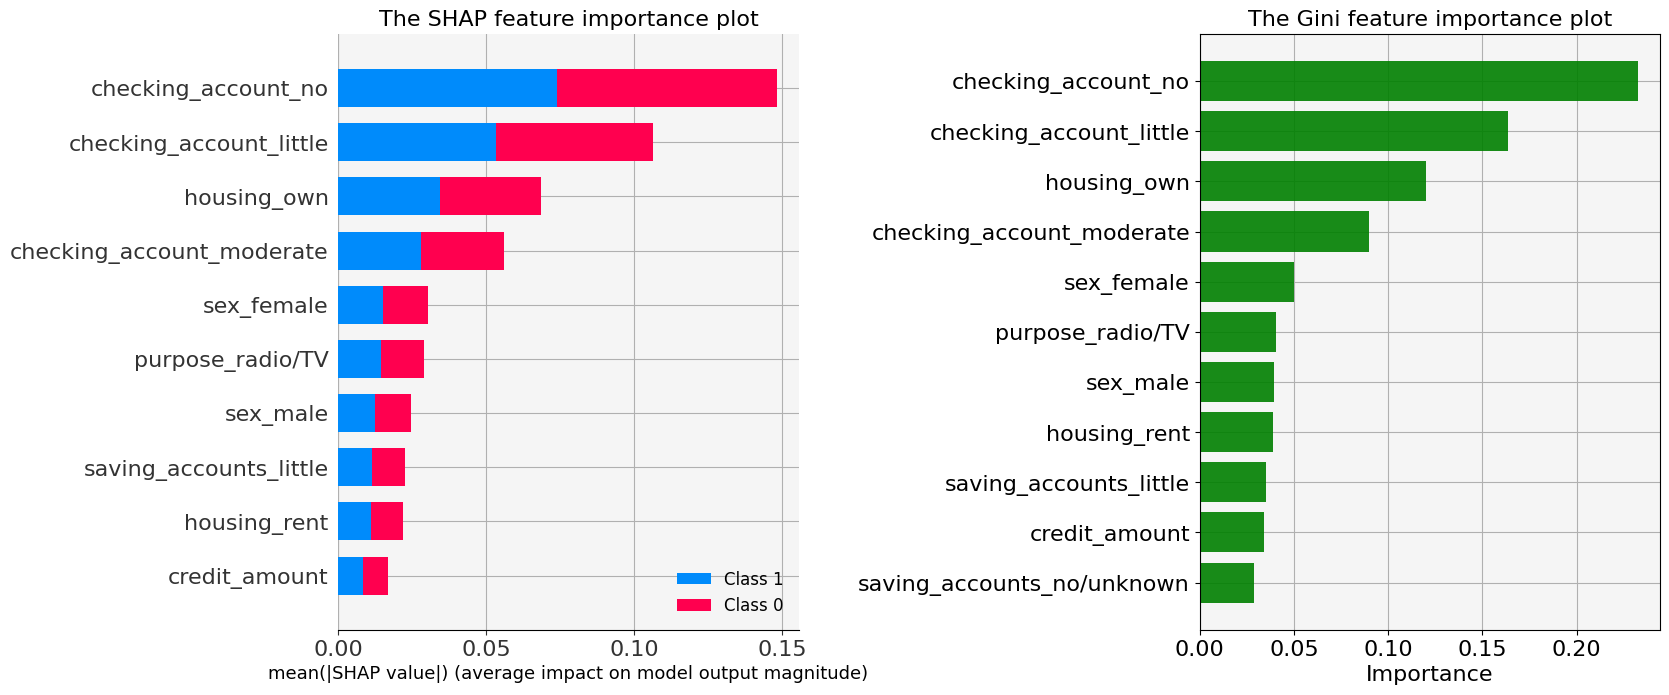

In [ ]:
plt.subplot(331)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10, show=False);
fig = plt.gcf() # gcf means "get current figure"
fig.set_size_inches(26, 21)
fig.set_dpi(100)
ax2 = plt.gca() #gca means "get current axes"
ax2.tick_params(axis='both', labelsize=16)
plt.title('The SHAP feature importance plot', fontsize = 16)
ax2.set(facecolor = "whitesmoke")
ax2.set_axisbelow(True)
plt.grid()

plt.subplot(332)
importances = best_model.feature_importances_
indices = np.argsort(importances)[18:] # Top 10 Features
features = X_test.columns
fig = plt.gcf() # gcf means "get current figure"
fig.set_size_inches(26, 21)
fig.set_dpi(100)
plt.title('The Gini feature importance plot', fontsize = 16)
plt.barh(range(len(indices)), importances[indices], color='g', align='center',linestyle="solid", alpha = 0.9)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance', fontsize = 16)
ax1 = plt.gca() #gca means "get current axes"
ax1.tick_params(axis='both', labelsize=16)
ax1.set(facecolor = "whitesmoke")
ax1.set_axisbelow(True)
plt.grid()

plt.tight_layout(pad=2)
plt.show()

A figura acima ilustra a importancia das features por sua ordenação decrescente (mais acima, mais importante).
> - Class 0 = Cliente Ruim
> - Class 1 = Cliente Bom

Comparando ambos os gráficos de feature importance obtidos a partir do modelo random forest, observa-se que as 10 features de mais alto poder preditivo em ambos os métodos, não são exatamente as mesmas e não estão na mesma ordem quanto a ordem de importância.

A inconveniência do gráfico Feature Importance baseado no índice de gini não é possível analisar se cada uma dessas features influenciam positiva ou negativamente no resultado, o que dificulta concluir de maneira mais assertiva o que realmente é decisivo para conceder ou não uma carta de crédito para um cliente.

Agora, nesse contexto, de um ponto de vista global, os resultados do feature importance plot via SHAP são mais interessantes, dado que o método é baseado em permutação de variáveis (conforme podemos observar na figura acima), é possível mostrar se a relação dos preditores  (features) com a referida variável alvo é positiva (bom cliente para os negócios) ou negativa (Cliente ruim para os negócios). Para melhor visualizarmos essa relação, podemos plotar o gráfico de feature importance no formato de dispersão, considerando novamente como referência a classe positiva:

**Code:**

In [ ]:
#@title
def delta_shap(shap_values, df, max_display):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(shap_values)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'#FA1B39','#1E85FA')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2.tail(max_display)

    #print(k2)

    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(9,5),legend=False, fontsize = 12)
    ax.set_xlabel("mean (|SHAP value|) (overall influence per feature)", fontsize = 12)
    ax.set_ylabel("Features", fontsize = 12)
    ax.tick_params(axis='both', labelsize=12)
    ax.set(facecolor = "whitesmoke")
    plt.yticks(fontsize=11)
    plt.tight_layout()
    for index, value in enumerate(k2['SHAP_abs']):
        plt.text(value, index, str(np.around(value,4)))
        plt.rc('font', size=10)
    ax.set_axisbelow(True)
    plt.grid()
    plt.show()

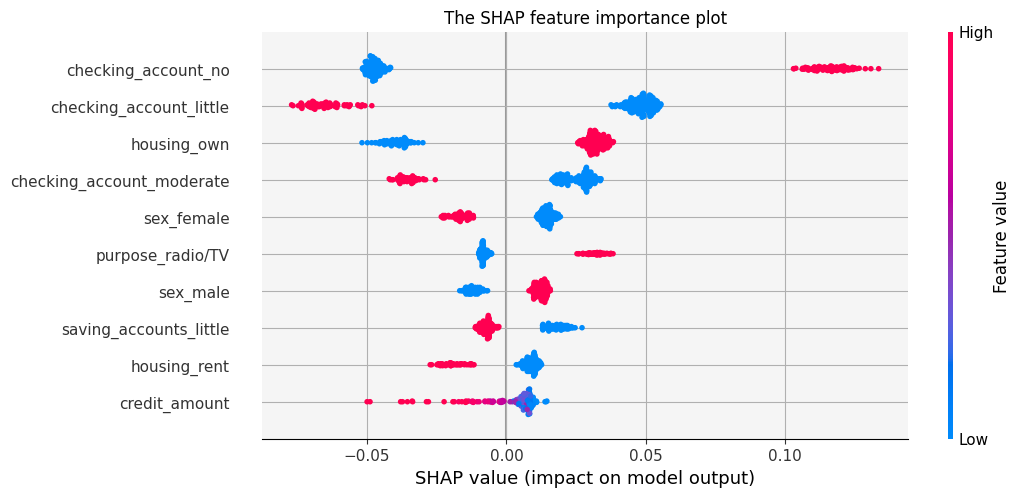

In [ ]:
import warnings
warnings.filterwarnings('ignore')
shap.summary_plot(shap_values[1], X_test, plot_type="dot", max_display = 10, show=False)
fig = plt.gcf() # gcf means "get current figure"
fig.set_size_inches(14, 5)
fig.set_dpi(100)
ax = plt.gca() #gca means "get current axes"
ax.tick_params(axis='both', labelsize=11)
ax.set(facecolor = "whitesmoke")
plt.title('The SHAP feature importance plot', fontsize = 12)
plt.grid(); plt.show()

> - Cada ponto no gráfico representa uma contribuição de valor SHAP de uma instância (linha) do dataset. E conforme o esperado, a distribuição de pontos entre as features não é a mesma, pois nem todas as 250 instâncias do dataset de treino contribuem com algum valor shap para uma dada feature.
>  
> - A expansão horizontal das nuvens de pontos de cada feature está associado a uma previsão maior ou menor poder de predição de cada feature para o modelo. Nuvens de pontos desagrupadas são um indicativo que a feature assume apenas alguns valores discretos (provavelmente era categórica e passou por uma codificação) e Nuvens que compôem uma sequência de agrupamento de pontos é um indicativo que a feature apresenta valores continuos (e provavelmente ela é númerica de natureza).
>
> - Como a nossa referência é a classe positiva, então valores positivos  indicam um suporte para a classe de referência (contribui pro modelo responder classe positiva no final) e valores negativos indicam um suporte à classe oposta (neste caso de classificação binária, seria a classe negativa)
>
> - E as cores representam um alto/baixo poder de predição para uma dada classe, onde tons mais vermelhos são valores altos e tons azulados são valores mais baixos. Associado a isso, quanto maior o intervalo de alcance de valores SHAP, melhor será aquela variável para o modelo. uma divisão bem clara de cores (vermelho e azul em lugares opostos) é um indicativo que uma dada feature é uma boa variável preditora, no sentindo de facilmente visualizarmos o impacto da feature ao modelo, isto é, a classe na qual a feature tende julgar como correta.

De forma geral, no gráfico acima pode-se concluir os seguintes insights:
> - A feature `checking_account_no` e `housing_own` claramente apresentam um impacto positivo (densidade de pontos em vermelho a direita, tende a considerar classe positiva como verdadeira), isto é, potenciais clientes com "alto valor" dessas features (i.e. cliente sem conta corrente e/ou casa própria`) tem altas chances do modelo aprova-lo para concessão de uma carta de crédito.  
>
> - A feature `duration` e `credit_amount` tem um impacto negativo em relação a classe de referência (densidade de pontos em vermelho a esquerda, tende a considerar classe mau pagador como verdadeira), isto é, potenciais clientes com "alto valor" dessas features (i.e, pedido de carta de crédito alta e/ou tempo longo para quitação da divida) o modelo tem altas chances de reprova-lo para concessão de uma carta de crédito.

Desse modo, ao compararmos esses insights utilizando SHAP com a compreensão geral do problema de inadimplencia financeira, o SHAP agrega mais confiança que o modelo é mais intuitivo e tende a tomar as decisões corretas. Por exemplo é bem intuitivo que uma instituição financeira queira conceder uma carta de crédito para um potencial cliente sem conta corrente naquela instituição, pois essa seria uma estratégia para captar esse cliente e poder ofertar outros serviços.

Por completeza, a seguir temos uma variante do gráfico acima, com SHAP em valores absolutos:




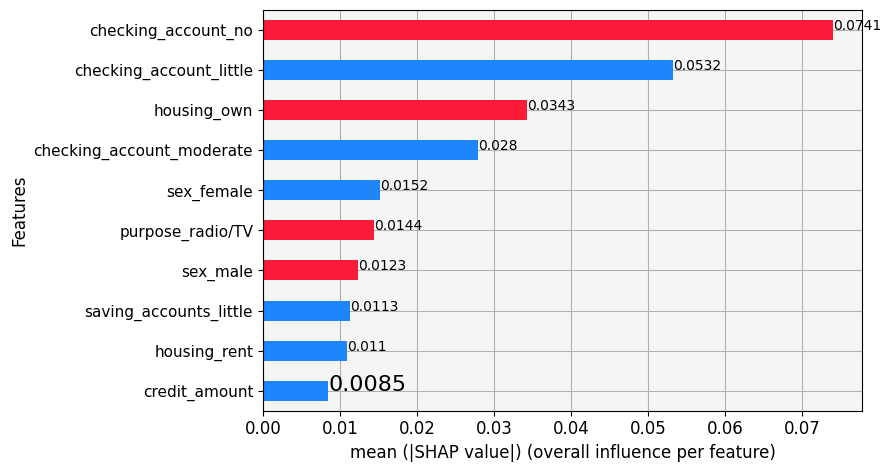

In [ ]:
delta_shap(shap_values[1], X_test, max_display = 10)

Com o gráfico acima, temos um panorama geral de como o modelo chega a suas conclusões a partir das instâncias do dataset, onde temos um top 10 com 5 features de impacto geral negativo e um total 4 features com impacto geral positivo. Esse resultado é coerente com os percentuais da matriz confusão onde a soma de valores de VP+FP é equiparável a soma de VN+FN.  






**(B) SHAP Dependence Plot - Interpretabilidade Global**

Apesar de estar contido no pacote do SHAP, esta técnica é independente desta teoria. Porém, sua visualização está bem estabelecida dentro deste pacote. Partial Dependence Plots (PDP) são uma forma de você avaliar o impacto da predição do modelo a partir da relação entre o target e duas features, informando se a relação é linear, monotônica ou mais complexa. Eu penso que análises como essas são interessantes quando as features mais impactantes são de natureza continua (que não é o caso aqui), porém, vamos avaliar a relação entre algumas features com valores continuos e automaticamente será incluido a feature que mais interage com ela, novamente usando com referência a classe positiva:


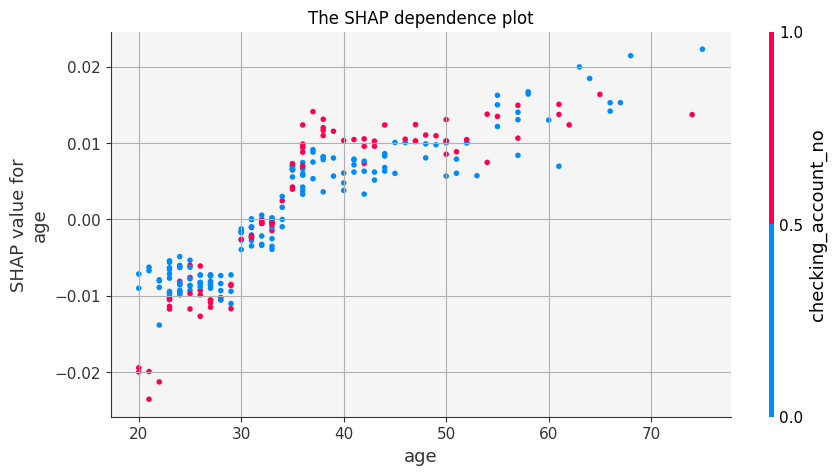

In [ ]:
shap.dependence_plot('age', shap_values[1], X_test, show=False)
fig = plt.gcf() # gcf means "get current figure"
fig.set_size_inches(10, 5)
fig.set_dpi(100)
ax = plt.gca() #gca means "get current axes"
ax.tick_params(axis='both', labelsize=11)
ax.set(facecolor = "whitesmoke")
plt.title('The SHAP dependence plot', fontsize = 12)
plt.grid(); plt.show()

Avaliando o gráfico em questão temos os valores da feature `age` no eixo-X e seus valores SHAP no eixo-Y. As cores dos pontos são os valores da feature que interage com mais frequencia com `age`: No caso, `checking_account_no`.

De início conseguimos perceber uma certa tendência linear e positiva: a medida que a idade do potencial cliente aumenta, independente se ele tem conta corrente ou não no banco, o valor de shap aumenta, tendo-se uma maior probabilidade do modelo classificar o individuo como bom cliente.


Este tipo de resultado é bem interessante de encontrar, pois ele ajuda a fortalecer ainda mais a confiança do modelo.




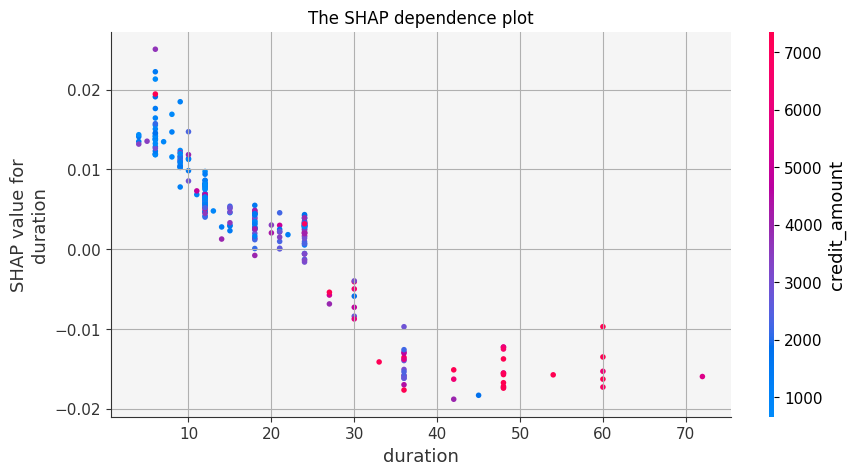

In [ ]:
shap.dependence_plot('duration', shap_values[1], X_test, interaction_index='credit_amount', show=False)
fig = plt.gcf() # gcf means "get current figure"
fig.set_size_inches(10, 5)
fig.set_dpi(100)
ax = plt.gca() #gca means "get current axes"
ax.tick_params(axis='both', labelsize=11)
ax.set(facecolor = "whitesmoke")
plt.title('The SHAP dependence plot', fontsize = 12)
plt.grid(); plt.show()

Já neste caso, vemos inicialmente a relação entre os valores SHAP e a variável `duration` (tempo para quitação da divida) é peculiar, meio que em formato em S,  diferente da relação linear que achamos anteriormente. Além disso, valores maiores de `credit_amount` (tempo para quitação da divida) se concentram mais na inferior do superior do gráfico com valores negativos de SHAP.

Visualizações como essa podem gerar outros resultados como: A correlação dos valores SHAP *vs* os valores da variável alvo pode ser significante? Assim encontraríamos por exemplo uma clara correlação simples entre o resultado do modelo e o valor da variável.

**(C)  The SHAP Force Plot - Interpretabilidade Local**

Além de visualizarmos o impacto global das features, podemos utilizar o  `shap.force_plot()` para visualizar como as features contribuem para previsões individuais do modelo.

Para uma instância arbitrária ($i$) é necessário três valores:
> - O valor de base que consiste no limite de predição do seu modelo para escolher uma classe como correta (bool == 1), nesse caso em particular, esse cálculo de valor esperado foi obtido a partir do dataset `X_test` (`explainer.expected_value[1]`).
>
> - Os valores SHAP (`shap_values_Model[i][1]`)
>
> - E uma instância do dataset (`X_test.iloc[[i]]`).

No caso, eu considerei dois cenários:

> - O modelo estimou uma **alta probabilidade** do cliente (instância 12 do `X_test`) ser **ruim** para os negócios
>
> - O modelo estimou uma **alta probabilidade** do cliente (instância 3 do `X_test`) ser **bom** para os negócios

Ilustrando o primeiro cenário:

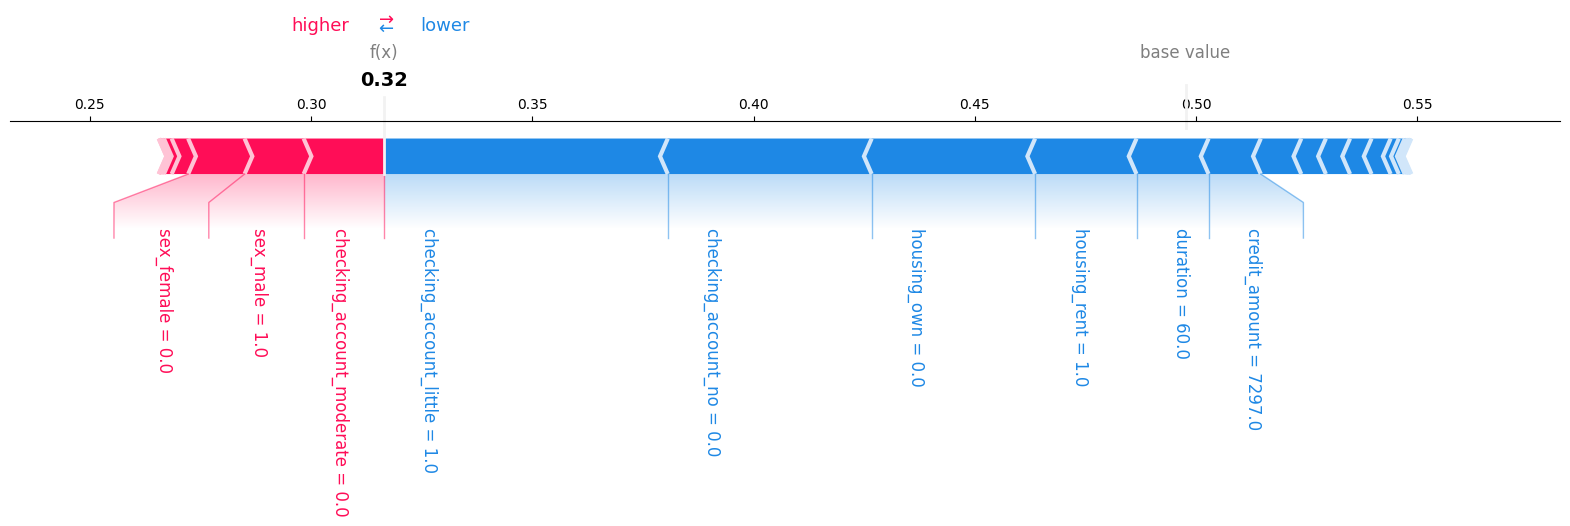

In [ ]:
shap.initjs()
i = 13 # cliente do dataset de teste classificado como ruim
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[[i]],  text_rotation=270, matplotlib = True)


##.

Alguns considerações importantes sobre esse elegante gráfico:

> - Conforme o esperado o modelo RF tem um valor de base 0.5 (50%), dado que foi efetuado o oversampling do dataset.
>
> - Esses fatores em cor azul (denotado pelas flechas), empurram a previsão para a esquerda e os fatores vermelhos empurram a previsão para a direita. Assim, ele se estabelece em 0.27, ou seja, o modelo prevê um total de 27% para esse cliente ser bom e logo 73% e probabilidade do cliente ser ruim.
>
> - As features mais impactantes para esse resultado são `housing_own = 0` (não ter casa própria), `checking_account_no = 0`, (no caso, conta corrente = "pequena")  e `duration = 60` (tempo de empréstimo = 60 meses)

Prosseguindo com o segundo cenário:

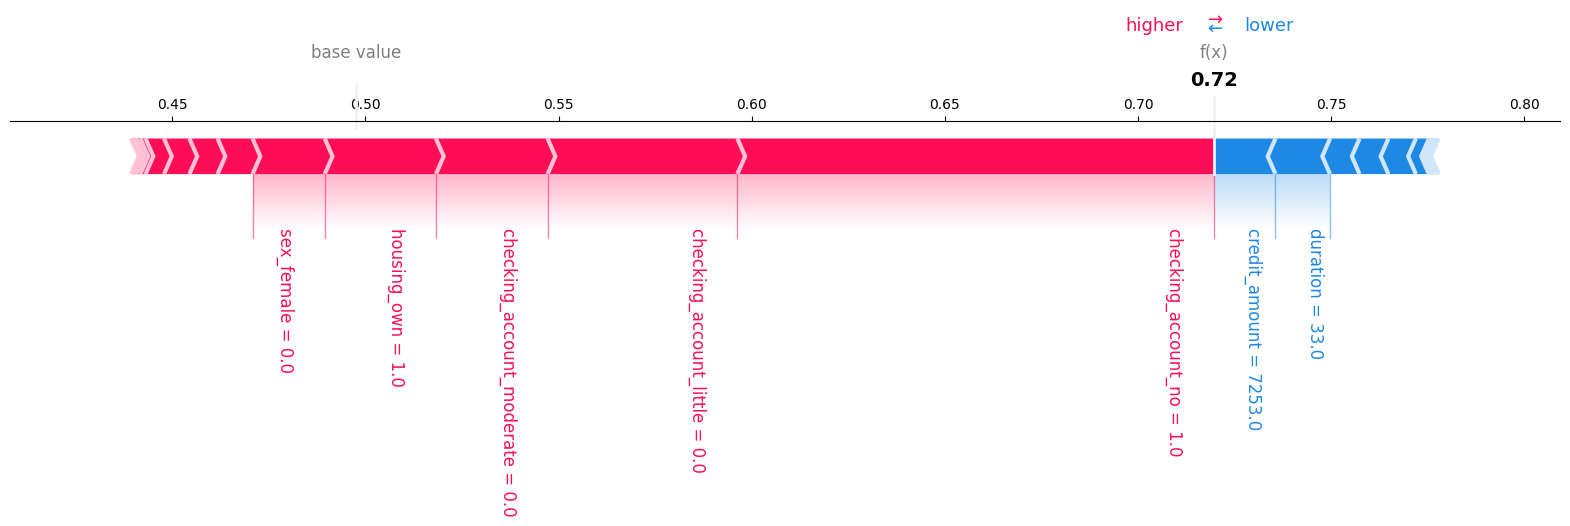

In [ ]:
shap.initjs()
i = 4 # cliente do dataset de teste classificado como bom
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[[i]],  text_rotation=270, matplotlib = True)


Para essa predição individual os fatores chaves são completamente diferentes da instância anterior:

> - Os fatores em cor vermelha empurram a previsão para a esquerda e os fatores vermelhos são prevalentes, empurrando a previsão mais para a direita, se estabelecendo em 0.72. Assim, o modelo prevê uma probabilidade de 72% desse cliente ser bom pagador e consequentemente a probabilidade do cliente ser ruim é de 28%.
>
> - As features mais impactantes para esse resultado são `housing_own = 1` (ter casa própria), `checking_account_no = 1`, (no caso, sem conta corrente).



**(D)  The Decision Plot - Interpretabilidade Local**

Se houver muitos preditores (features) importantes, `force_plot` ficará muito "poluido" (que não é o presente estudo de caso). Então o Decision Plot será uma boa escolha:

The final prediction is 0.72


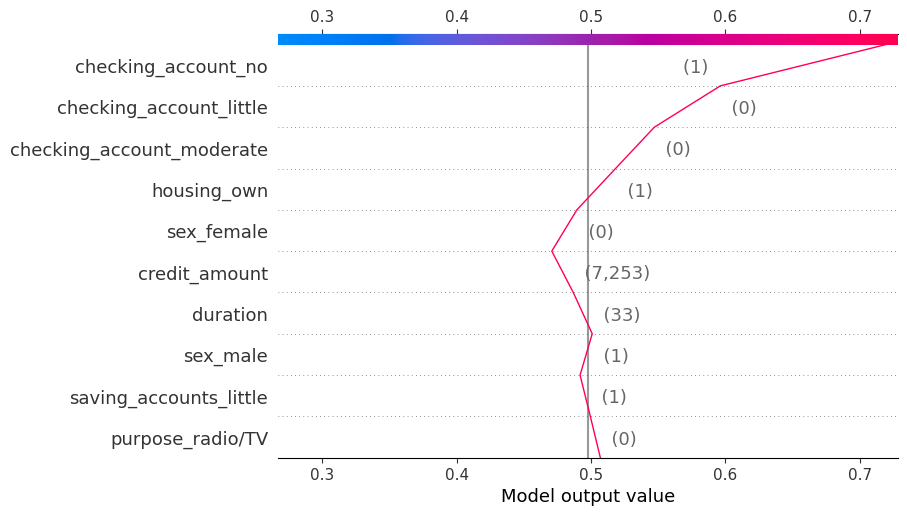

In [ ]:
i = 4 # instância nº 5 do dataset de teste classificado como bom cliente
print("\033[1mThe final prediction is {0:.2f}".format(best_model.predict_proba(X_test)[i][1]))
shap.decision_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[[i]], feature_display_range=slice(-1, -11, -1))

The final prediction is 0.32


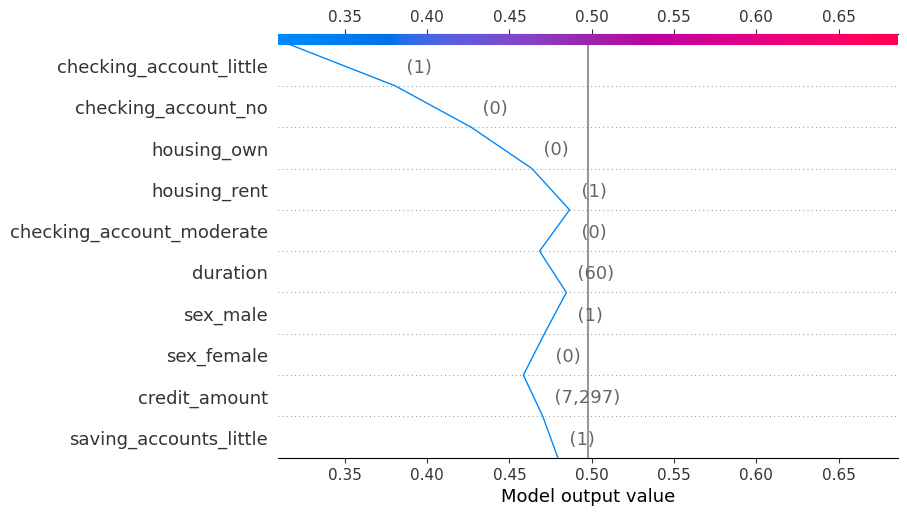

In [ ]:
i = 13 # cliente do dataset de teste classificado como ruim
print("\033[1mThe final prediction is {0:.2f}".format(best_model.predict_proba(X_test)[i][1]))
shap.decision_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[[i]], feature_display_range=slice(-1, -11, -1))

Como podemos observar as mesmas informações do `force_plot` podem ser abstraidas a partir do `decision_plot`. A linha vertical no centro é o valor base. A linha vermelha (quando a predição é positiva) ou azul (quando a predição é negativa) denota a predição final, cujo o valor é indicado pela extremidade superior da linha, que coincide com a escala de predição valores.


## **Conclusão**

A explicabilidade do modelo é um tópico importante no aprendizado de máquina. Os valores SHAP ajudam a entender o modelo em nível local e global. O pacote SHAP Python é uma biblioteca útil para calcular valores SHAP, visualizando a importância e o impacto das features em um modelo preditivo.

## Atividade complementar: <span style='color:Gray'> Montagem de uma classificação usando Pipeline do Sklearn (KNN, Naive Bayes e Decision Tree).  </span>

Predizendo a inadimplência de clientes: German Credit dataset


Autor: Wanderson Ferreira


</div>
<left><img src="https://raw.githubusercontent.com/wanderson42/portfolio-data/main/credit_risk.jpg" width="700"/> <center>
</div>

<p><center>Imagem meramente ilustrativa</center></p>


In [ ]:
%%capture
! pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## **5. Feature Engineering & Construção do Modelo: Pipelines**

Uma vez efetuada a EDA, vamos escrever o código que contempla o processo de feature engineering através de pipelines do scikit-learn.

**5.1 Feature Engineering**


In [ ]:
# Dividindo os dados em conjunto de feature e target
features  = df.drop(['risk'], axis=1)
target = df['risk']

numeric_features = ['age', 'credit_amount', 'duration']
categorical_features = ['sex', 'job', 'housing', 'saving_accounts', 'checking_account', 'purpose']

# Pipeline para pré-processamento das variáveis numéricas
numeric_preprocessor = Pipeline(steps=[
    ('robust', RobustScaler()),
    ('scaler', MinMaxScaler())])

# Pipeline para pré-processamento das variáveis categóricas
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('one_hot_enc', OneHotEncoder())])

# Compondo os pré-processadores para formar o pipeline completo
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_preprocessor, numeric_features),
    ('cat', categorical_preprocessor, categorical_features)])

# Ajustando e Transformando os dados.
X_features_data_prepared = preprocessor.fit_transform(features)
y_target_data_prepared = LabelEncoder().fit_transform(target)

# Visualizar pipeline
set_config(display='diagram')
display(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('robust', RobustScaler()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['age', 'credit_amount', 'duration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='none',
                                                                strategy='constant')),
                                                 ('one_hot_enc',
                                                  OneHotEncoder())]),
                                 ['sex', 'job', 'housing', 'saving_accounts',
                                  'checking_account', 'purpose'])])

**5.2 Construção dos Modelos: KNN, Decision Tree e Naive Bayes**


Não há como ter multiplos modelos de classificação como etapas do Pipeline, pois ele só admite um e deve ser a última etapa.


O motivo é simples: Os classifiers geralmente não possuem o método transform, o que é um requisito das etapas internas do Pipeline do Scikit-learn. E se quisermos testar diversos hiperparâmetros para decidir qual o melhor conjunto para um dado modelo... vish complicou mais ainda!





Felizmente existe uma maneira muito elegante de fazer isso utilizando programação orientada a objetos, onde podemos criar nossa própria pipeline customizada chamada de `TuringEstimatorSelector`.

A ideia aqui é bem simples, você passa para uma classe dois dicionários: os modelos e os parâmetros; então você chama o método fit, espera até que tudo rode, e depois chama o método score_summary() para ter um bom DataFrame com o relatório de cada instância do modelo, de acordo com os melhores hiperparâmetros.


In [ ]:
class TuringEstimatorSelector:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Alguns estimadores estão sem parâmetros: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=10, scoring=None, n_jobs=-1, verbose=1, refit=True):
        def fluxogram(): # função parar exibir diagrama de blocos
            return display(gs)
        for key in self.keys:
            print("Executando GridSearchCV para %s." % key)
            model = self.models[key]
            params = self.params[key]
            scores_dict = {
               'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)
            }
            gs = GridSearchCV(model, params, cv=cv, n_jobs=-1, scoring = scores_dict,
                              verbose=verbose, refit='f1', return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs
            fluxogram()

    def score_summary(self):
          model_list = []
          for m in self.grid_searches:
              # obter nome do modelo para rotular o DataFrame final:
              model_name = str(self.grid_searches[m].estimator)
              # obter diversas métricas - fazer subset e gerar DataFrame:
              temp_df = pd.DataFrame(self.grid_searches[m].cv_results_)[
                                              ['params',
                                              'mean_test_accuracy',
                                              'mean_test_recall',
                                              'mean_test_precision',
                                              'mean_test_f1']].query('mean_test_f1 == mean_test_f1.max()')
              '''
              Inclui os DataFrames de modelos com os melhores hyperparâmetros
              numa lista e adiciona a coluna "model" em cada DataFrame:
              '''
              model_list.append(temp_df.assign(model=model_name))
              del temp_df
          # Concatena a lista de Dataframes:
          models_grid_df = pd.concat(model_list)
          # Move a coluna "model" para o inicio do DataFrame
          shiftPos = models_grid_df.pop("model"); models_grid_df.insert(0, "model", shiftPos)
          return models_grid_df

No código acima, em cada objeto `GridSearchCV` criado, testa-se cada hyperparâmetro correspondente ao seu respectivo modelo de pipeline. No caso, os hiperparâmetros foram tunados com `cv = 10` para o gridsearch realizar a validação cruzada em nosso conjunto de dados e `scoring = 'accuracy'` como métrica para obtermos uma avaliação de cada modelo. Vale resssaltar que cv = 10 é um valor escolhido arbitrariamente, no apendice esse parâmetro é explicado.



Para automatizar a parte do processo de tuning dos modelos de machine learning, utilizei o módulo GridSearchCV para ajustar os modelos. As métricas que podem ser utilizadas para avaliar cada conjunto de parâmetros simulados pelo `GridSearchCV` podem ser:

* _recall_;
* _precision_;
* _accuracy_;
* f1, ou;
* fbeta_score (Obs.: Note que o `f1` é um caso específico do `fbeta_score` quando `beta = 1`.).

E para não limitar a avaliação do modelo utilizando apenas uma só métrica, utilizei o `make_scorer` que é um módulo do Scikit Learn que possibilita o `GridSearchCV` calcular e armazenar multiplas métricas no objeto do `GridSearchCV`.






Sem mais delongas agora que temos tudo pronto vamos utilizar
o transformador customizado `TuringEstimatorSelector`!

Primeiro devemos usar dois dicionarios: O primeiro serve para armazenar os classfiers e o segundo os hiperparâmetros:

In [ ]:
# Dicionário com os classificadores.
classifiers = {'knn': KNeighborsClassifier(),
               'dt': DecisionTreeClassifier(),
               'nb': BernoulliNB()}

# Parametros de todos os classifiers para o GridSearchCV testar.
hyperparameters = {'knn': {'n_neighbors' : np.arange(5, 15, 2),
                           'weights'     : ['uniform','distance'],
                           'metric'      : ['minkowski','euclidean','manhattan']
                          },
                    'dt': {'criterion'   : ['gini', 'entropy'],
                           'max_depth'   : np.arange(3, 6, 1)
                          },
                    'nb': {'alpha'       : np.arange(0.01, 0.1, 0.01),
                           'fit_prior'   : [True, False]}
                  }

Já temos toda a parte do _classifier_ pronta juntamente com a definição dos hiperparâmetros.  Agora finalmente vamos fitar os modelos:

In [ ]:
results = TuringEstimatorSelector(classifiers, hyperparameters)
results.fit(X_features_data_prepared, y_target_data_prepared, refit = 'f1', n_jobs=-1)

Executando GridSearchCV para knn.
Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 5,  7,  9, 11, 13]),
                         'weights': ['uniform', 'distance']},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(fbeta_score, beta=1),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

Executando GridSearchCV para dt.
Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5])},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(fbeta_score, beta=1),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

Executando GridSearchCV para nb.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'fit_prior': [True, False]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(fbeta_score, beta=1),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

Vale ressaltar que sem definir uma estratégia de escolha é muito difícil prever o melhor conjunto de hiperparâmetros. Dessa maneira, definiu-se o `refit` para que o `GridSearchCV` possa eleger a melhor solução quando solicitado. No presente estudo de caso, foi definido `f1` como estratégia de escolha para definir o melhor conjunto de hiperparâmetros de cada modelo de classificação.

Para imprimir as melhores métricas dentre o conjunto de parâmetros utilizei uma _query_ para selecionar um conjunto de parâmetros. Conforme estipulado, definiu-se o conjunto com o maior valor de `f1` e imprimiu-se os valores de `accuracy`, `recall`, `precision` e `f1`.

In [ ]:
pd.set_option('display.max_colwidth', None)
display(results.score_summary())

,model,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
8,KNeighborsClassifier(),"{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}",0.726,0.911429,0.751317,0.823220
18,KNeighborsClassifier(),"{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}",0.726,0.911429,0.751317,0.823220
0,DecisionTreeClassifier(),"{'criterion': 'gini', 'max_depth': 3}",0.720,0.902857,0.750235,0.818738
0,BernoulliNB(),"{'alpha': 0.01, 'fit_prior': True}",0.706,0.782857,0.796359,0.788444


De acordo com a tabela acima, baseando-se na métrica `f1`, as melhores soluções correspondem ao modelo `KNN` com os seguintes conjutos de hiperparâmetros: `{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}` ou `{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}`. Plotando a matriz de confusão:

In [ ]:
#class_names=np.array(['0','1'])
def plot_confusion_matrix(cf_matrix):
    group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(8,6)); ax = sns.heatmap(cf_matrix, annot=labels, fmt='',annot_kws={"fontsize":13},cmap="Blues")
    ax.set_title('Matriz de Confusão'); ax.set_xlabel('\nPredito', fontsize=14); ax.set_ylabel('Real', fontsize=14);
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Mal Pagador','Bom pagador'],fontsize=14)
    ax.yaxis.set_ticklabels(['Mal Pagador','Bom pagador'],fontsize=14)
    ## Display the visualization of the Confusion Matrix.
    plt.show()

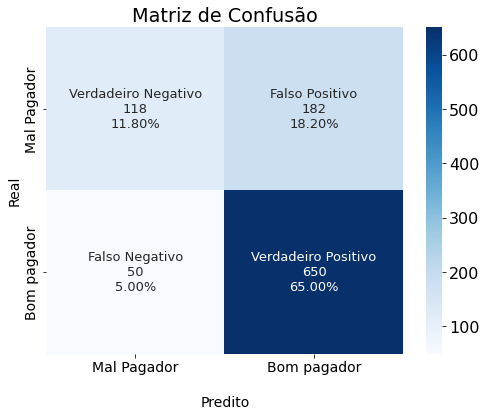

None

In [ ]:
 # Instanciando o KNN com os melhores parâmetros e fitando o modelo
knn_model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 13, weights = 'uniform')
knn_model.fit(X_features_data_prepared, y_target_data_prepared)
# Testando o modelo
y_pred = knn_model.predict(X_features_data_prepared)
# Matriz Confusão
cf_matrix = metrics.confusion_matrix(y_target_data_prepared, y_pred)
display(plot_confusion_matrix(cf_matrix))

Logo podemos ver que o modelo KNN fez um ótimo trabalho ao prever a inadimplência observando os verdadeiros positivos na diagonal.

## **Apêndice**

De forma complementar segue uma discussão mais detalhada a respeito do método GridSearch. Nesse caso irei considerar apenas um modelo:

In [ ]:
# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}

# Criação dos objetos de GridSearchCV.
knn_grid = GridSearchCV(estimator = classifiers['knn'],
                    param_grid = hyperparameters['knn'],
                    scoring = meus_scores,
                    refit = 'f1', # Escolhi essa métrica para decidir qual são os melhores hiperparâmetros
                    cv = 10)

# Fitando o modelo:
knn_grid_model = knn_grid.fit(X_features_data_prepared, y_target_data_prepared)

Vamos analisar o atributo `.cv_results_` de qualquer um dos modelos para verificar se houve a adição das colunas com os valores das métricas desejadas.

In [ ]:
# Fazendo uma subamostragem.
pd.DataFrame(knn_grid_model.cv_results_).columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_metric',
 'param_n_neighbors',
 'param_weights',
 'params',
 'split0_test_accuracy',
 'split1_test_accuracy',
 'split2_test_accuracy',
 'split3_test_accuracy',
 'split4_test_accuracy',
 'split5_test_accuracy',
 'split6_test_accuracy',
 'split7_test_accuracy',
 'split8_test_accuracy',
 'split9_test_accuracy',
 'mean_test_accuracy',
 'std_test_accuracy',
 'rank_test_accuracy',
 'split0_test_recall',
 'split1_test_recall',
 'split2_test_recall',
 'split3_test_recall',
 'split4_test_recall',
 'split5_test_recall',
 'split6_test_recall',
 'split7_test_recall',
 'split8_test_recall',
 'split9_test_recall',
 'mean_test_recall',
 'std_test_recall',
 'rank_test_recall',
 'split0_test_precision',
 'split1_test_precision',
 'split2_test_precision',
 'split3_test_precision',
 'split4_test_precision',
 'split5_test_precision',
 'split6_test_precision',
 'split7_test_precision',
 'split8_test_precision',
 'split9_test_

Conforme esperado, agora o objeto `grid` possui todas as métricas desejadas para uma análise detalhada. Observe que foram feitas 10 simulações para cada conjunto de parâmetros (que vc pode visualizar na coluna `params`). Ao passo que "train" e "test" referem-se à divisão do _dataset_ em treino e test, note que o `GridSearchCV` já faz isso automaticamente!! Logo, não há necessidade de dividir o _dataset_ usando o `train_test_split` antes de treinar o seu objeto `grid`, pois quando o parâmetro `cv` é configurado para um número inteiro (neste caso 10) é feito "ocultamente" um `StratifiedKFolds`, conforme pode ser confirmado na documentação do módulo `GridSearchCV`.




## **Análise de Redução de dimensionalidade (Rascunho):**
**Análise PCA:**

Com a PCA, também podemos encontrar o número de features necessárias para explicar a variância do dataset. Temos um total de 29 features, vamos visualizar o poder de previsão de cada uma, em termos da PCA, sobre o target.

Considerando uma análise preliminar, o PCA pressupõe que os componentes principais são uma combinação linear das features originais. Se as suas features não são linearmente relacionadas, o PCA pode não dar resultados sensatos.

Por exemplo, se as suas features seguem um relacionamento não-linear, como uma relação polinomial de segunda ordem, o PCA pode não ser capaz de capturar essa relação de forma adequada. Nesse caso, seria necessário utilizar outras técnicas, como a Análise de Componentes Independentes (ICA) ou o Kernel PCA, que são capazes de lidar com relações não-lineares entre as features.

Existem várias maneiras de verificar a linearidade das features para determinar se o PCA é adequado. Uma maneira simples é traçar um gráfico de dispersão (scatter plot) de cada par de features e verificar se há alguma relação linear aparente entre elas. Se as features apresentarem uma relação linear, elas devem estar fortemente correlacionadas e devem produzir um padrão reconhecível no gráfico de dispersão.

Sem mais delongas, primeiramente vamos considerar os dados originais e aplicar o PCA com duas componentes principais:




In [ ]:
from sklearn.decomposition import PCA
# Aplicando PCA com duas componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Agora, vou criar um gráfico de dispersão com as duas componentes principais e utilizar a cor para diferenciar as classes

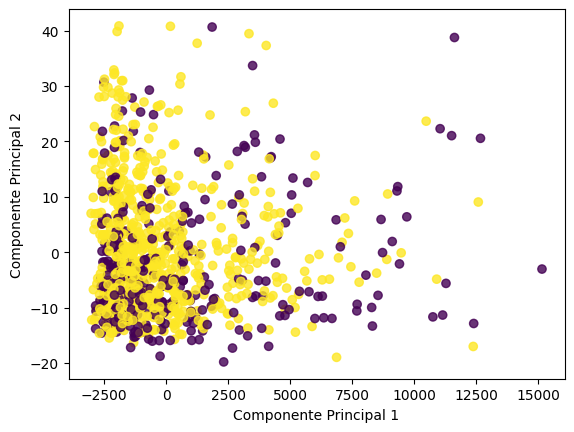

In [ ]:
# Criando o gráfico de dispersão
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.8)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

A partir do gráfico corroboramos que a PCA não é apropriada para esse tipo de conjunto de dados, pois a presença de uma grande proporção de features de natureza categórica pode tornar o PCA inadequado. Além disso, como as variáveis ​​categóricas transformadas por codificação One-Hot resultam em variáveis ​​binárias, onde a relação entre elas pode não ser linear e pode ser difícil interpretar as componentes principais resultantes. Uma vez que o PCA assume linearidade entre as variáveis ​​e funciona melhor com variáveis numéricas contínuas. Nesses casos, outras técnicas de redução de dimensionalidade que sejam mais adequadas para lidar com dados categóricos, como a Análise de Correspondência Múltipla (MCA) ou a Análise Fatorial de Correspondência (FCA), podem ser mais úteis.

#### PCA - rascunho

Na PCA é indispensável que as features apresentem uma distribuição aproximadamente normal de dados e/ou tenham escalas similares. Portanto, precisamos dimensionar algumas features em nosso dataset de treino e teste antes de aplicarmos a PCA. E conforme a EDA, as features `age`, `duration` e `credit_amount` são constituidas por inteiros positivos e uma variância desigual entre si, além de possuirem uma distribuição  assimétria à direita, portanto é conveniente aplicar uma transformação logarítmica em nessas features para lidar com a assimetria dos dados e, em seguida, aplicar a padronização z-score para realizar a análise de componentes principais (PCA).


In [ ]:

from sklearn.preprocessing import StandardScaler

# Log transform function
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

# log transfer
X_train_pca = log_transform(X_train, numeric_features)
X_test_pca = log_transform(X_test, numeric_features)

# Padronização de features
scaler = StandardScaler().set_output(transform="pandas")

# Aplicando a transformação StandardScale em todas as features
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

# Construir um objeto para realizar a PCA
pca = PCA()

# Aplicar a PCA, instânciando o objeto com os dados de treino
X_train_pca = pca.fit_transform(X_train_pca)

# Converter para dataframe
component_names = [f"PCA_{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
X_train_pca.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29
count,750.000000,7.500000e+02,7.500000e+02,750.000000,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,...,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02
mean,0.000000,1.468455e-16,1.278977e-16,0.000000,-3.315866e-17,1.563194e-16,-1.184238e-17,6.039613e-17,1.243450e-17,-3.789561e-17,...,-1.859253e-16,1.207923e-16,-7.105427e-18,2.842171e-17,9.086521e-17,7.856491e-17,4.871474e-17,-3.683298e-17,3.221699e-17,7.582816e-17
std,1.615276,1.562270e+00,1.418141e+00,1.365302,1.335428e+00,1.219131e+00,1.176138e+00,1.165255e+00,1.115255e+00,1.099633e+00,...,8.985064e-01,8.915351e-01,7.895851e-01,5.659279e-01,2.418027e-15,1.045499e-15,5.082503e-16,4.707637e-16,3.038971e-16,1.796831e-16
min,-4.249629,-3.506234e+00,-3.473790e+00,-2.913751,-3.899914e+00,-3.645082e+00,-4.121403e+00,-2.534078e+00,-3.969714e+00,-2.388053e+00,...,-2.978515e+00,-2.726065e+00,-2.546223e+00,-1.696948e+00,-7.384922e-15,-1.433170e-14,-4.052192e-15,-2.776102e-15,-2.510133e-15,-1.230528e-15
25%,-1.081076,-1.195864e+00,-1.084188e+00,-1.012461,-9.277777e-01,-8.263116e-01,-7.359048e-01,-9.327950e-01,-6.974105e-01,-7.621688e-01,...,-5.169830e-01,-4.758877e-01,-5.109831e-01,-3.921958e-01,-2.467179e-16,-1.543740e-16,-4.242518e-17,-1.717861e-16,-3.536406e-17,2.709742e-17
50%,0.140070,-1.677271e-01,2.621093e-02,-0.055016,7.781431e-03,-6.704345e-02,5.734569e-02,-5.734049e-02,-2.112139e-02,-9.420577e-02,...,-5.208532e-02,7.068696e-02,1.735805e-02,-2.749849e-02,1.097925e-16,7.075972e-17,4.649899e-17,-4.585460e-17,2.445417e-17,6.495425e-17
75%,1.080760,1.014231e+00,9.562810e-01,0.937111,8.822765e-01,8.413096e-01,8.224022e-01,9.093293e-01,6.432081e-01,6.252444e-01,...,5.033544e-01,5.218498e-01,5.230441e-01,3.721006e-01,3.815079e-16,2.447245e-16,1.413628e-16,7.483536e-17,8.546072e-17,1.096456e-16
max,4.775326,4.991903e+00,3.749569e+00,4.329696,5.056465e+00,3.710903e+00,5.165520e+00,3.302542e+00,5.476943e+00,4.468521e+00,...,4.527792e+00,3.954437e+00,2.622535e+00,2.404704e+00,6.379629e-14,1.778071e-14,1.104669e-14,9.303699e-15,6.179467e-15,2.503286e-15


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29
sex_female,-0.452749,0.177619,-0.167150,0.177875,0.096412,-0.272845,0.215714,0.172013,0.056317,0.007829,...,-0.049635,-0.032129,-0.019017,0.027199,-0.651303,-0.275325,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
sex_male,0.452749,-0.177619,0.167150,-0.177875,-0.096412,0.272845,-0.215714,-0.172013,-0.056317,-0.007829,...,0.049635,0.032129,0.019017,-0.027199,-0.651303,-0.275325,-9.086243e-17,-5.679227e-17,-1.210284e-18,-1.910921e-16
job_highly_skilled,0.278588,0.270318,0.042747,0.183143,0.043543,-0.253222,-0.105229,0.198992,-0.105220,-0.124656,...,-0.292747,-0.447476,0.084827,-0.084712,0.112133,-0.265260,-3.931646e-01,-5.350123e-02,-1.140570e-01,-3.975918e-03
job_skilled,-0.157697,-0.181144,-0.288004,-0.457877,-0.259305,0.117253,0.241489,-0.010739,0.136070,-0.035420,...,0.111633,0.038649,-0.047270,0.043442,0.146157,-0.345745,-5.124584e-01,-6.973454e-02,-1.486641e-01,-5.182288e-03
job_unskilled_&_non-resident,-0.041611,0.075252,0.066536,0.059350,0.183132,0.094409,0.226801,-0.109084,-0.106513,-0.130688,...,-0.303770,0.463507,0.023565,-0.030420,0.043758,-0.103513,-1.534250e-01,-2.087784e-02,-4.450859e-02,-1.551526e-03


Plote a (variância) da contribuição de informações do PCA gráfico de barra:

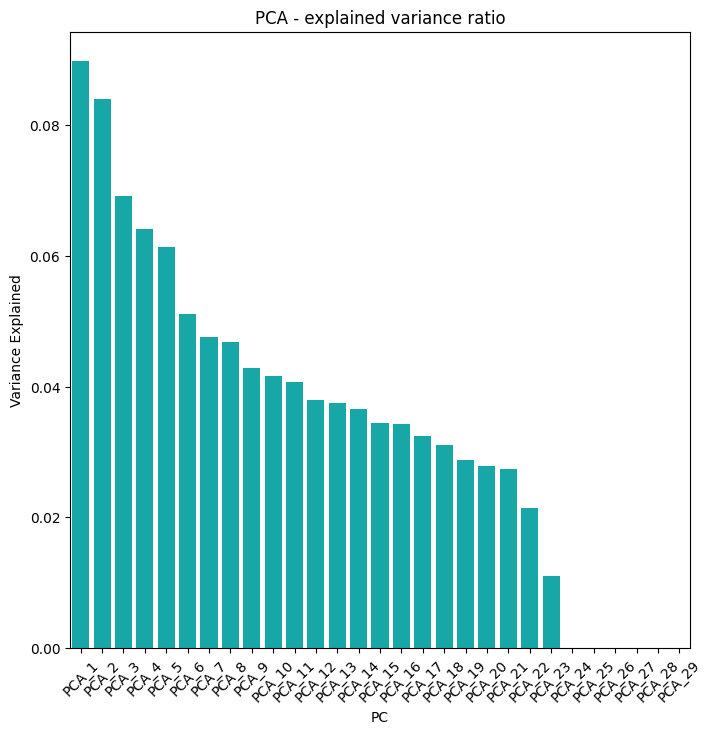

In [ ]:
# Create a DataFrame for visulisation
pca_df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'PC':X_train_pca.columns})

plt.figure(figsize=(8, 8))
plt.title('PCA - explained variance ratio')
# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained',
           data=pca_df, color="c")
plt.xticks(rotation=45)
plt.show()

Plote a variância acumulada:

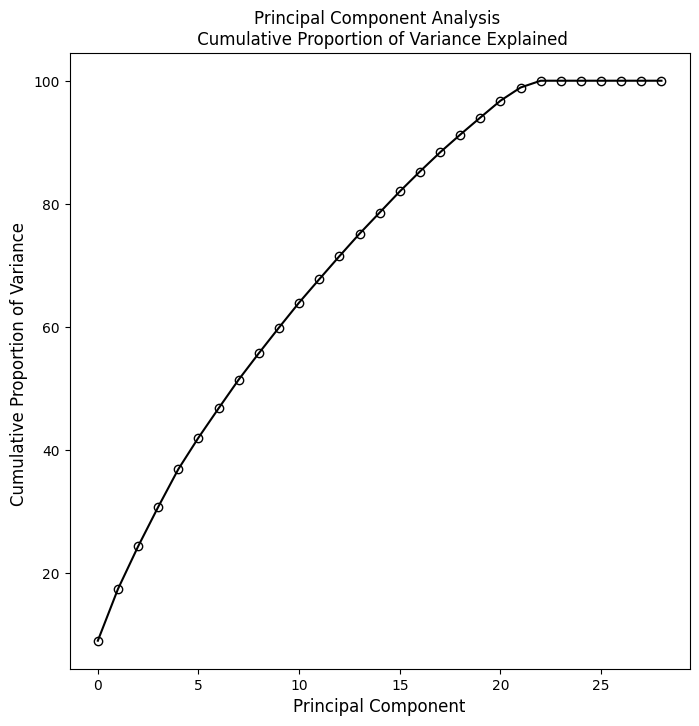

In [ ]:
plt.figure(figsize=(8, 8))
# Instantiate, fit and transform

var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis \n Cumulative Proportion of Variance Explained',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance ",fontsize=12)
plt.show()